In [1]:
import ClientZ
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
client_credentials_manager = SpotifyClientCredentials(client_id=clientid, client_secret=clientsecret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
artistname = []
trackname = []
trackpopularity = []
artistid = []
trackid = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artistname.append(t['artists'][0]['name'])
        artistid.append(t['artists'][0]['id'])
        trackname.append(t['name'])
        trackid.append(t['id'])
        trackpopularity.append(t['popularity'])

In [4]:
df_2020= pd.DataFrame({"artistname" :artistname, "trackname" : trackname, "trackpopularity" :trackpopularity, "artistid": artistid, "trackid" :trackid})
df_2020.head()

,artistname,trackname,trackpopularity,artistid,trackid
0,Elley Duhé,MIDDLE OF THE NIGHT,91,67MNhiAICFY6Pwc2YxCO0K,58HvfVOeJY7lUuCqF0m3ly
1,Waylon Jennings,The Year 2003 Minus 25 - Remastered,40,7wCjDgV6nqBsHguQXPAaIM,0sFq478LIo9BFwf2qzMzzF
2,Glass Animals,Heat Waves,85,4yvcSjfu4PC0CYQyLy4wSq,3USxtqRwSYz57Ewm6wWRMp
3,Tame Impala,Alter Ego - 2020 Mix,42,5INjqkS1o8h1imAzPqGZBb,457sndKohlwTU6dW6amBMU
4,The Weeknd,Blinding Lights,88,1Xyo4u8uXC1ZmMpatF05PJ,0VjIjW4GlUZAMYd2vXMi3b


In [5]:
artistpopularity =[]
artistgenres =[]
artistfollowers=[]
for Artistid in df_2020.artistid:
    artist = sp.artist(Artistid)
    artistpopularity.append(artist["popularity"])
    artistgenres.append(artist["genres"])
    artistfollowers.append(artist["followers"]["total"])
df_2020 = df_2020.assign(artistpopularity=artistpopularity, artistgenres=artistgenres, artistfollowers=artistfollowers)
df_2020.head()

,artistname,trackname,trackpopularity,artistid,trackid,artistpopularity,artistgenres,artistfollowers
0,Elley Duhé,MIDDLE OF THE NIGHT,91,67MNhiAICFY6Pwc2YxCO0K,58HvfVOeJY7lUuCqF0m3ly,76,"[alt z, pop]",242465
1,Waylon Jennings,The Year 2003 Minus 25 - Remastered,40,7wCjDgV6nqBsHguQXPAaIM,0sFq478LIo9BFwf2qzMzzF,66,"[country, country rock, outlaw country, texas ...",1129392
2,Glass Animals,Heat Waves,85,4yvcSjfu4PC0CYQyLy4wSq,3USxtqRwSYz57Ewm6wWRMp,81,"[gauze pop, indietronica, shiver pop]",2863317
3,Tame Impala,Alter Ego - 2020 Mix,42,5INjqkS1o8h1imAzPqGZBb,457sndKohlwTU6dW6amBMU,78,"[australian psych, neo-psychedelic]",5672218
4,The Weeknd,Blinding Lights,88,1Xyo4u8uXC1ZmMpatF05PJ,0VjIjW4GlUZAMYd2vXMi3b,92,"[canadian contemporary r&b, canadian pop, pop]",45020264


In [8]:
trackfeatures=[]
for TRACKID in df_2020['trackid']:
    AUDIOFEATURES=sp.audio_features(TRACKID)
    trackfeatures.append(AUDIOFEATURES)
track_df2020=pd.DataFrame(columns =["danceability", "energy", "loudness", "valence"])
track_df2020.head()
for i in trackfeatures:
    for n in i:
        track_df2020=track_df2020.append(n, ignore_index=True)
track_df2020.head()

,danceability,energy,loudness,valence,acousticness,analysis_url,duration_ms,id,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,track_href,type,uri
0,0.41,0.611,-8.271,0.0899,0.02280,https://api.spotify.com/v1/audio-analysis/58Hv...,184448.0,58HvfVOeJY7lUuCqF0m3ly,0.000000,4.0,0.1160,0.0,0.0467,185.727,3.0,https://api.spotify.com/v1/tracks/58HvfVOeJY7l...,audio_features,spotify:track:58HvfVOeJY7lUuCqF0m3ly
1,0.626,0.457,-13.785,0.474,0.35500,https://api.spotify.com/v1/audio-analysis/0sFq...,184267.0,0sFq478LIo9BFwf2qzMzzF,0.000009,4.0,0.0668,1.0,0.0384,102.166,4.0,https://api.spotify.com/v1/tracks/0sFq478LIo9B...,audio_features,spotify:track:0sFq478LIo9BFwf2qzMzzF
2,0.761,0.525,-6.9,0.531,0.44000,https://api.spotify.com/v1/audio-analysis/3USx...,238805.0,3USxtqRwSYz57Ewm6wWRMp,0.000007,11.0,0.0921,1.0,0.0944,80.870,4.0,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,audio_features,spotify:track:3USxtqRwSYz57Ewm6wWRMp
3,0.408,0.903,-2.924,0.368,0.00256,https://api.spotify.com/v1/audio-analysis/457s...,289867.0,457sndKohlwTU6dW6amBMU,0.000821,0.0,0.1170,1.0,0.0561,128.942,4.0,https://api.spotify.com/v1/tracks/457sndKohlwT...,audio_features,spotify:track:457sndKohlwTU6dW6amBMU
4,0.514,0.73,-5.934,0.334,0.00146,https://api.spotify.com/v1/audio-analysis/0VjI...,200040.0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1.0,0.0897,1.0,0.0598,171.005,4.0,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,audio_features,spotify:track:0VjIjW4GlUZAMYd2vXMi3b


In [9]:
df_2020['artistname'] =df_2020["artistname"].astype("string")
df_2020['trackname'] = df_2020['trackname'].astype("string")
df_2020['trackid'] = df_2020['trackid'].astype("string")
df_2020['artistid'] = df_2020['artistid'].astype("string")
track_df2020['duration_ms'] = pd.to_numeric(track_df2020['duration_ms'])
track_df2020['instrumentalness'] = pd.to_numeric(track_df2020['instrumentalness'])
track_df2020["valence"] =pd.to_numeric(track_df2020["valence"])
print(df_2020.info())
print(track_df2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artistname        1000 non-null   string
 1   trackname         1000 non-null   string
 2   trackpopularity   1000 non-null   int64 
 3   artistid          1000 non-null   string
 4   trackid           1000 non-null   string
 5   artistpopularity  1000 non-null   int64 
 6   artistgenres      1000 non-null   object
 7   artistfollowers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   object 
 1   energy            1000 non-null   object 
 2   loudness          1000 non-null   object 
 3   valence           1000

In [10]:
dropthese=['analysis_url', 'duration_ms', 'type', 'uri']
track_df2020.drop(columns=dropthese, inplace=True)
track_df2020.head()

,danceability,energy,loudness,valence,acousticness,id,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,track_href
0,0.41,0.611,-8.271,0.0899,0.02280,58HvfVOeJY7lUuCqF0m3ly,0.000000,4.0,0.1160,0.0,0.0467,185.727,3.0,https://api.spotify.com/v1/tracks/58HvfVOeJY7l...
1,0.626,0.457,-13.785,0.4740,0.35500,0sFq478LIo9BFwf2qzMzzF,0.000009,4.0,0.0668,1.0,0.0384,102.166,4.0,https://api.spotify.com/v1/tracks/0sFq478LIo9B...
2,0.761,0.525,-6.9,0.5310,0.44000,3USxtqRwSYz57Ewm6wWRMp,0.000007,11.0,0.0921,1.0,0.0944,80.870,4.0,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...
3,0.408,0.903,-2.924,0.3680,0.00256,457sndKohlwTU6dW6amBMU,0.000821,0.0,0.1170,1.0,0.0561,128.942,4.0,https://api.spotify.com/v1/tracks/457sndKohlwT...
4,0.514,0.73,-5.934,0.3340,0.00146,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1.0,0.0897,1.0,0.0598,171.005,4.0,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...


In [11]:
df2020_pop=df_2020.sort_values(by=['trackpopularity'], ascending=False)[['trackname', 'artistname']].head(100)
df2020_pop1=pd.concat([df_2020,track_df2020], axis=1).reindex(df_2020.index)



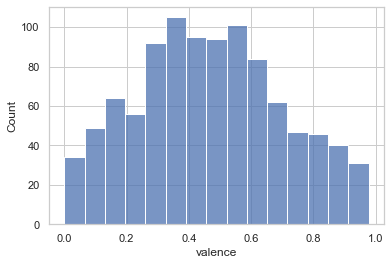

In [12]:
sns.set_theme(style="whitegrid")
sns.histplot( data=df2020_pop1, x="valence")
plt.show()

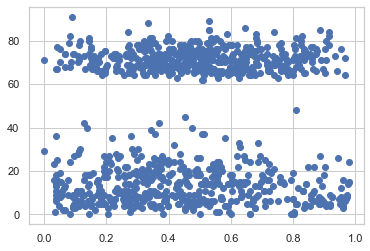

In [13]:
plt.scatter(data=df2020_pop1, x="valence", y="trackpopularity")
plt.show()
#The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.

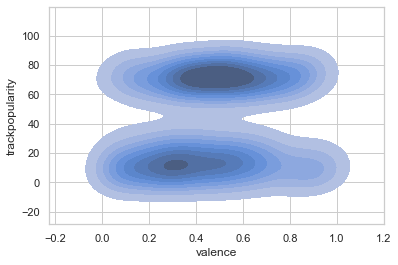

In [14]:
sns.kdeplot(data=df2020_pop1, x="valence", y="trackpopularity", fill=True)
plt.show()

In [15]:
artistname = []
trackname = []
trackpopularity = []
artistid = []
trackid = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2019', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artistname.append(t['artists'][0]['name'])
        artistid.append(t['artists'][0]['id'])
        trackname.append(t['name'])
        trackid.append(t['id'])
        trackpopularity.append(t['popularity'])

In [16]:
df_2019=pd.DataFrame({"artistname" :artistname, "trackname" : trackname, "trackpopularity" :trackpopularity, "artistid": artistid, "trackid" :trackid})
df_2019.head()

,artistname,trackname,trackpopularity,artistid,trackid
0,Harry Styles,Watermelon Sugar,88,6KImCVD70vtIoJWnq6nGn3,6UelLqGlWMcVH1E5c4H7lY
1,Otmar Eros,"Year 2016:, Pt. 4",20,5XY9JN9PcQ41KQTZqtyhsL,1sUxW2zAmXA7lXHC8Dxu4s
2,"Tyler, The Creator",NEW MAGIC WAND,82,4V8LLVI7PbaPR0K2TGSxFF,0fv2KH6hac06J86hBUTcSf
3,Matt Monro,The Music Played - 2019 Stereo Remix,44,06kr5yNAM2rOf4DXemM8fl,5E8remXZPiYuvZEzavW4lT
4,Yot Club,YKWIM?,82,6FugQjLquBF4JzATRN70bR,2vWBUC9djv6BtiGlmKiQaH


In [17]:
artistpopularity =[]
artistgenres =[]
artistfollowers=[]
for Artistid in df_2019.artistid:
    artist = sp.artist(Artistid)
    artistpopularity.append(artist["popularity"])
    artistgenres.append(artist["genres"])
    artistfollowers.append(artist["followers"]["total"])
df_2019 = df_2019.assign(artistpopularity=artistpopularity, artistgenres=artistgenres, artistfollowers=artistfollowers)
df_2019.head()

,artistname,trackname,trackpopularity,artistid,trackid,artistpopularity,artistgenres,artistfollowers
0,Harry Styles,Watermelon Sugar,88,6KImCVD70vtIoJWnq6nGn3,6UelLqGlWMcVH1E5c4H7lY,93,[pop],20847293
1,Otmar Eros,"Year 2016:, Pt. 4",20,5XY9JN9PcQ41KQTZqtyhsL,1sUxW2zAmXA7lXHC8Dxu4s,22,[],5
2,"Tyler, The Creator",NEW MAGIC WAND,82,4V8LLVI7PbaPR0K2TGSxFF,0fv2KH6hac06J86hBUTcSf,85,"[hip hop, rap]",8792662
3,Matt Monro,The Music Played - 2019 Stereo Remix,44,06kr5yNAM2rOf4DXemM8fl,5E8remXZPiYuvZEzavW4lT,51,"[adult standards, brill building pop, classic ...",233140
4,Yot Club,YKWIM?,82,6FugQjLquBF4JzATRN70bR,2vWBUC9djv6BtiGlmKiQaH,68,"[bedroom pop, indie pop]",170296


In [18]:
trackfeatures=[]
for TRACKID in df_2019['trackid']:
    AUDIOFEATURES=sp.audio_features(TRACKID)
    trackfeatures.append(AUDIOFEATURES)
track_df2019=pd.DataFrame(columns =["danceability", "energy", "loudness", "valence"])
track_df2019.head()
for i in trackfeatures:
    for n in i:
        track_df2019=track_df2019.append(n, ignore_index=True)
track_df2019.head()

,danceability,energy,loudness,valence,acousticness,analysis_url,duration_ms,id,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,track_href,type,uri
0,0.548,0.816,-4.209,0.557,0.1220,https://api.spotify.com/v1/audio-analysis/6Uel...,174000.0,6UelLqGlWMcVH1E5c4H7lY,0.000000,0.0,0.3350,1.0,0.0465,95.390,4.0,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,audio_features,spotify:track:6UelLqGlWMcVH1E5c4H7lY
1,0.241,0.064,-24.272,0.0372,0.9940,https://api.spotify.com/v1/audio-analysis/1sUx...,69840.0,1sUxW2zAmXA7lXHC8Dxu4s,0.950000,5.0,0.0715,1.0,0.0602,141.739,4.0,https://api.spotify.com/v1/tracks/1sUxW2zAmXA7...,audio_features,spotify:track:1sUxW2zAmXA7lXHC8Dxu4s
2,0.621,0.73,-5.414,0.464,0.0967,https://api.spotify.com/v1/audio-analysis/0fv2...,195320.0,0fv2KH6hac06J86hBUTcSf,0.000131,5.0,0.6730,0.0,0.1070,139.566,4.0,https://api.spotify.com/v1/tracks/0fv2KH6hac06...,audio_features,spotify:track:0fv2KH6hac06J86hBUTcSf
3,0.39,0.345,-13.941,0.351,0.3700,https://api.spotify.com/v1/audio-analysis/5E8r...,201960.0,5E8remXZPiYuvZEzavW4lT,0.000015,6.0,0.5880,0.0,0.0279,80.764,1.0,https://api.spotify.com/v1/tracks/5E8remXZPiYu...,audio_features,spotify:track:5E8remXZPiYuvZEzavW4lT
4,0.372,0.537,-7.623,0.228,0.9370,https://api.spotify.com/v1/audio-analysis/2vWB...,212750.0,2vWBUC9djv6BtiGlmKiQaH,0.873000,9.0,0.2870,1.0,0.0305,123.735,3.0,https://api.spotify.com/v1/tracks/2vWBUC9djv6B...,audio_features,spotify:track:2vWBUC9djv6BtiGlmKiQaH


In [19]:
df_2019['artistname'] =df_2019["artistname"].astype("string")
df_2019['trackname'] = df_2019['trackname'].astype("string")
df_2019['trackid'] = df_2019['trackid'].astype("string")
df_2019['artistid'] = df_2019['artistid'].astype("string")
track_df2019['duration_ms'] = pd.to_numeric(track_df2019['duration_ms'])
track_df2019['instrumentalness'] = pd.to_numeric(track_df2019['instrumentalness'])
track_df2019["valence"] =pd.to_numeric(track_df2019["valence"])
print(df_2019.info())
print(track_df2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artistname        1000 non-null   string
 1   trackname         1000 non-null   string
 2   trackpopularity   1000 non-null   int64 
 3   artistid          1000 non-null   string
 4   trackid           1000 non-null   string
 5   artistpopularity  1000 non-null   int64 
 6   artistgenres      1000 non-null   object
 7   artistfollowers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      999 non-null    object 
 1   energy            999 non-null    object 
 2   loudness          999 non-null    object 
 3   valence           999 n

In [20]:
dropthese=['analysis_url', 'duration_ms', 'type', 'uri']
track_df2019.drop(columns=dropthese, inplace=True)
track_df2019.head()

,danceability,energy,loudness,valence,acousticness,id,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,track_href
0,0.548,0.816,-4.209,0.5570,0.1220,6UelLqGlWMcVH1E5c4H7lY,0.000000,0.0,0.3350,1.0,0.0465,95.390,4.0,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...
1,0.241,0.064,-24.272,0.0372,0.9940,1sUxW2zAmXA7lXHC8Dxu4s,0.950000,5.0,0.0715,1.0,0.0602,141.739,4.0,https://api.spotify.com/v1/tracks/1sUxW2zAmXA7...
2,0.621,0.73,-5.414,0.4640,0.0967,0fv2KH6hac06J86hBUTcSf,0.000131,5.0,0.6730,0.0,0.1070,139.566,4.0,https://api.spotify.com/v1/tracks/0fv2KH6hac06...
3,0.39,0.345,-13.941,0.3510,0.3700,5E8remXZPiYuvZEzavW4lT,0.000015,6.0,0.5880,0.0,0.0279,80.764,1.0,https://api.spotify.com/v1/tracks/5E8remXZPiYu...
4,0.372,0.537,-7.623,0.2280,0.9370,2vWBUC9djv6BtiGlmKiQaH,0.873000,9.0,0.2870,1.0,0.0305,123.735,3.0,https://api.spotify.com/v1/tracks/2vWBUC9djv6B...


In [21]:
df2019_pop=df_2019.sort_values(by=['trackpopularity'], ascending=False)[['trackname', 'artistname']].head(100)
df2019_pop1=pd.concat([df_2019,track_df2019], axis=1).reindex(df_2019.index)

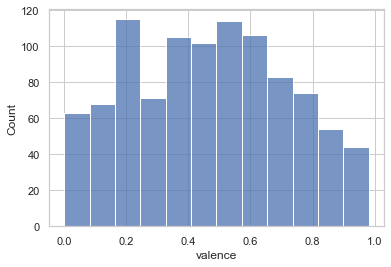

In [22]:
sns.set_theme(style="whitegrid")
sns.histplot( data=df2019_pop1, x="valence")
plt.show()

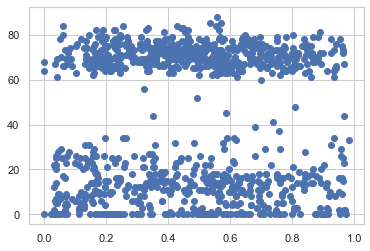

In [23]:
plt.scatter(data=df2019_pop1, x="valence", y="trackpopularity")
plt.show()

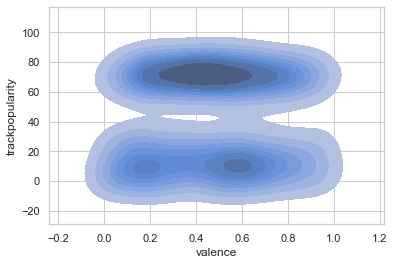

In [24]:
sns.kdeplot(data=df2019_pop1, x="valence", y="trackpopularity",fill=True)
plt.show()

In [25]:
x=df2019_pop1["valence"].var()
print(x)
print(df2019_pop1["valence"].shape[0])
y=df2020_pop1["valence"].var()
print(y)
print(df2020_pop1["valence"].shape[0])
z=x/y
print(z) 



0.06276089667529255
1000
0.05556701306281276
1000
1.1294632051636075


Looking at the f test table with a degree of freedom of around for df1 1000 and for df2 the value would be very close to 1 I wanted to see if there was a statistically significant change in the mood of the music people listened to in 2020 compared to 2019 using valence as a notion to whether the music was more positive or negative. I used the f_test to find if it was infact statistically significant or not and according to the f table it is. because z is 1.1271 and z is 1.1271 so you would not reject the null hypothesis. But this doesn't say anything about the type of music listened to being better as there could be other factors such as there could have been more sad songs being released in 2020 vs 2019.


Looking at these graphs the density of valence is more well rounded in the 2019 histogram
compared to the 2020 histogram where the valence of tracks were more densely populated
in the middle of the graph.